In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train=pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Data information

In [2]:
train.shape

(42000, 785)

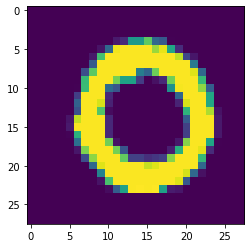

In [3]:
sample=np.array(train.iloc[1,:-1].values).reshape((28,28))
plt.imshow(sample)
plt.show()

In [4]:
X_train = np.array(train.iloc[:,:-1].values)
y_label = np.array(train.iloc[:,1].values)
print("X_train shape:",X_train.shape)
print("y_label shape:",y_label.shape)

X_train shape: (42000, 784)
y_label shape: (42000,)


## Load Data

In [6]:
from sklearn.model_selection import train_test_split
import torch
train_data = pd.read_csv('train.csv').values
X_train, y_train = (train_data[:, 1:]-127) / 255, train_data[:, 0].astype(np.long)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.3,shuffle=True)
print("Xtrain shape:",X_train.shape)
print("ylabel shape:",y_label.shape)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_train, y_train = torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float()
# TensorDataset <- 合并
train_dataset = torch.utils.data.TensorDataset(X_train, y_train) # 合并成dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=False)

Xtrain shape: (29400, 784)
ylabel shape: (42000,)


In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        # 定义网络结构
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 输入通道数目，输出通道数目，卷积核大小
        self.pool1 = nn.MaxPool2d(2, 2) # 最大值 池化层
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 4 * 4, 120) # 全连接层 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) #  10个类别

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)  
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
classes = ('0','1', '2', '3', '4','5', '6', '7', '8', '9')


In [8]:
Net()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [9]:
import torch.optim as optim
net = Net();
criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad() 

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step() # 参数更新

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  1000] loss: 1.144
[1,  2000] loss: 0.651
[1,  3000] loss: 0.187
[1,  4000] loss: 0.125
[1,  5000] loss: 0.102
[1,  6000] loss: 0.088
[1,  7000] loss: 0.070
[2,  1000] loss: 0.068
[2,  2000] loss: 0.058
[2,  3000] loss: 0.052
[2,  4000] loss: 0.050
[2,  5000] loss: 0.046
[2,  6000] loss: 0.045
[2,  7000] loss: 0.039
[3,  1000] loss: 0.041
[3,  2000] loss: 0.039
[3,  3000] loss: 0.034
[3,  4000] loss: 0.032
[3,  5000] loss: 0.031
[3,  6000] loss: 0.033
[3,  7000] loss: 0.027
Finished Training


In [11]:
PATH = './CNN.pth'
torch.save(net.state_dict(), PATH)

In [12]:
import matplotlib.pyplot as plt
import torchvision
test_data = pd.read_csv('test.csv').values
test_data = (test_data-127) / 255
print("test_data shape:",test_data.shape)
test_data =test_data.reshape(test_data.shape[0], 1, 28, 28)
test_data = torch.from_numpy(test_data).float()
test_dataset = torch.utils.data.TensorDataset(test_data) # 合并成dataset
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=5, shuffle=True)

test_data shape: (28000, 784)


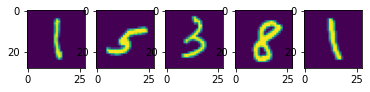

In [13]:
dataiter=iter(test_loader)
image = dataiter.next()
images = image[0]
image = images.numpy()
for i in range(5):
    plt.subplot(151+i)
    plt.imshow(image[i][0])

In [14]:
output=net(images)
output.shape

torch.Size([5, 10])

In [15]:
_,predicted = torch.max(output,1)
print(predicted)

tensor([1, 5, 3, 8, 1])


In [16]:
from sklearn.model_selection import train_test_split
X_cv = X_cv.reshape(X_cv.shape[0], 1, 28, 28)
X_cv, y_cv = torch.from_numpy(X_cv).float(), torch.from_numpy(y_cv)
cv_dataset = torch.utils.data.TensorDataset(X_cv, y_cv)
cv_loader= torch.utils.data.DataLoader(cv_dataset, batch_size=5, shuffle=True) 

In [17]:
total=0
correct=0
i=0
with torch.no_grad():
    for data in cv_loader:
        image,labels=data
        outputs = net(image)
        _,index = torch.max(outputs,1)
        total += labels.size(0) # 1 degree
        correct += (index == labels).sum().item() # tensor->int

In [19]:
print("Accurancy: ", np.round(correct * 100 / total,3))

Accurancy:  97.659


In [21]:
# submission
test_data=np.array([])
pred=[]
test_data = np.array(pd.read_csv('test.csv').values)
test_data = (test_data-127) / 255
test_data= torch.Tensor(test_data).float()
print("test_data shape:",test_data.shape)
test_data =test_data.reshape(test_data.shape[0], 1, 28, 28)
with torch.no_grad():
    for data in test_data:
        images = data
        images=images.unsqueeze(0) # 增加一个维度
        output = net(images)
        _,output=torch.max(output,1)
        pred.append(output)


test_data shape: torch.Size([28000, 784])


In [22]:
pred_list=[]
for i in pred:
    pred_list.append(i.item())

In [44]:
list_num=np.array([])
list_num = np.array(range(len(pred_list))).T
list_num += 1
pred_ndarray=np.array(pred_list)
submission=np.vstack((list_num,pred_ndarray)).T
submission=submission.tolist()

In [48]:
import csv
for i in range(2):
    for j in range(list_num.shape[0]):
        submission[j][i]=str(submission[j][i])
        
with open('output.csv', 'w', newline='') as f:  
    writer = csv.writer(f) 
    for j in range(list_num.shape[0]):
        writer.writerow(submission[j]) 